In [1]:
import os

path = "./dogs-vs-cats/train/"
os.listdir(path)

['dog.8011.jpg',
 'cat.5077.jpg',
 'dog.7322.jpg',
 'cat.2718.jpg',
 'cat.10151.jpg',
 'cat.3406.jpg',
 'dog.1753.jpg',
 'cat.4369.jpg',
 'cat.7660.jpg',
 'dog.5535.jpg',
 'cat.8553.jpg',
 'cat.9895.jpg',
 'cat.1211.jpg',
 'dog.3144.jpg',
 'dog.775.jpg',
 'dog.11102.jpg',
 'cat.6218.jpg',
 'dog.11664.jpg',
 'dog.3622.jpg',
 'cat.1577.jpg',
 'cat.12020.jpg',
 'dog.5253.jpg',
 'cat.7106.jpg',
 'cat.8235.jpg',
 'cat.952.jpg',
 'dog.9469.jpg',
 'dog.1035.jpg',
 'cat.3360.jpg',
 'cat.11529.jpg',
 'cat.10637.jpg',
 'dog.6982.jpg',
 'dog.8777.jpg',
 'dog.7444.jpg',
 'cat.5711.jpg',
 'cat.946.jpg',
 'cat.3374.jpg',
 'dog.1021.jpg',
 'dog.6996.jpg',
 'cat.10623.jpg',
 'dog.8763.jpg',
 'cat.5705.jpg',
 'dog.7450.jpg',
 'dog.12379.jpg',
 'dog.11670.jpg',
 'dog.4159.jpg',
 'cat.1563.jpg',
 'dog.3636.jpg',
 'cat.12034.jpg',
 'dog.2528.jpg',
 'cat.7112.jpg',
 'dog.5247.jpg',
 'cat.8221.jpg',
 'dog.10208.jpg',
 'dog.5521.jpg',
 'cat.7674.jpg',
 'cat.8547.jpg',
 'cat.9881.jpg',
 'dog.761.jpg',
 'dog.3

In [2]:
full_names = os.listdir(path)
labels = [each.split('.')[0] for each in full_names]
file_id = [each.split('.')[1] for each in full_names]

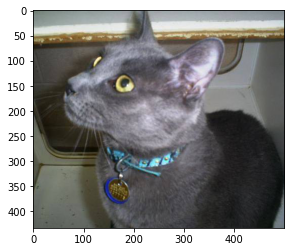

In [3]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

sample = random.choice(full_names)
image = mpimg.imread(path + sample)
plt.imshow(image)
plt.show()

In [4]:
sample = random.choice(full_names)
image = mpimg.imread(path + sample)
image.shape

(399, 500, 3)

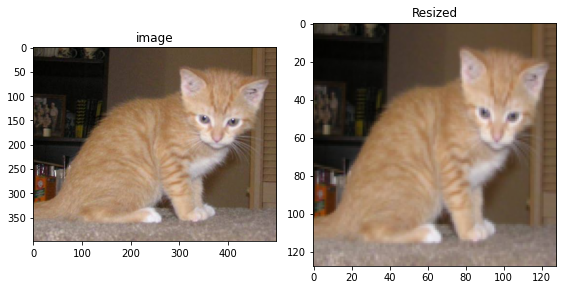

In [5]:
from skimage.transform import resize
resized = resize(image, (128,128,3))

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title("image")
ax[1].imshow(resized, cmap=plt.cm.gray)
ax[1].set_title("Resized")

fig.tight_layout()
plt.show()

In [6]:
from tqdm.notebook import tqdm
from skimage.color import rgb2gray
import numpy as np

images = []
bar_total = tqdm(full_names)
for file in bar_total:
    image = mpimg.imread(path + file)
    images.append(resize(image, (128,128,3)))
    
images = np.array(images)

  0%|          | 0/25000 [00:00<?, ?it/s]

In [7]:
images.shape, labels[:3]

((25000, 128, 128, 3), ['dog', 'cat', 'dog'])

In [8]:
images[:3]

array([[[[0.08066502, 0.1120098 , 0.17079982],
         [0.07761278, 0.12822553, 0.20459559],
         [0.12640931, 0.18884804, 0.28265931],
         ...,
         [0.60692402, 0.70496324, 0.86410941],
         [0.64099265, 0.74295343, 0.90169367],
         [0.64102616, 0.74690851, 0.90983743]],

        [[0.06148035, 0.09283088, 0.15161516],
         [0.06549766, 0.11617647, 0.19043639],
         [0.1088848 , 0.17132353, 0.2651348 ],
         ...,
         [0.59768402, 0.70215705, 0.86415441],
         [0.62372281, 0.72310528, 0.88388959],
         [0.64708084, 0.74513729, 0.90588235]],

        [[0.05790441, 0.08923196, 0.14805549],
         [0.06196098, 0.11257372, 0.18676471],
         [0.1088848 , 0.1716299 , 0.2653598 ],
         ...,
         [0.54289216, 0.65631127, 0.8286353 ],
         [0.59613971, 0.69791667, 0.85865215],
         [0.65110294, 0.74411765, 0.89993873]],

        ...,

        [[0.10091912, 0.13333333, 0.24601716],
         [0.08095607, 0.12089461, 0.20955882]

In [10]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(labels)
labels_encoded = encoder.transform(labels)
labels_encoded[:3], encoder.classes_

(array([1, 0, 1]), array(['cat', 'dog'], dtype='<U3'))

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, random_state=13, stratify=labels_encoded)

X_train.shape, X_test.shape

((20000, 128, 128, 3), (5000, 128, 128, 3))

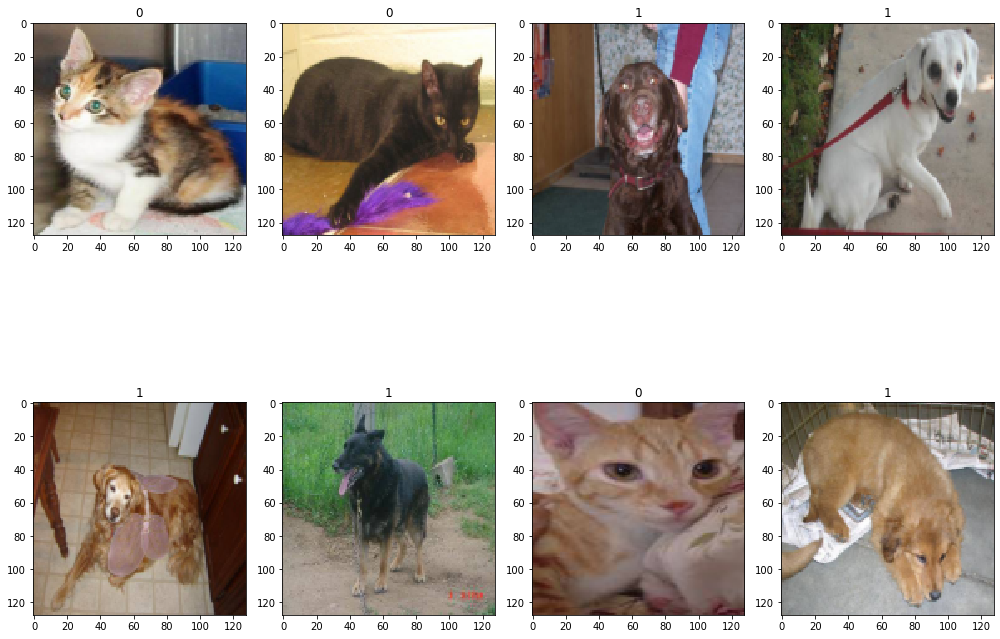

In [12]:
samples = random.choices(population=range(0, 20000), k=8)

plt.figure(figsize=(14,12))
for idx, n in enumerate(samples):
    plt.subplot(2, 4, idx+1)
    plt.imshow(X_train[n], cmap='Greys',
              interpolation='nearest')
    plt.title(y_train[n])
    
plt.tight_layout()
plt.show()

In [13]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(2, activation='softmax')    
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 63, 63, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 31, 31, 64)        3

In [14]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [15]:
import time

start_time = time.time()
hist = model.fit(X_train.reshape(20000,128,128,3), y_train,
                 epochs=5, verbose=1,
                 validation_data = (X_test.reshape(5000,128,128,3), y_test))
print("fit time : ", time.time() - start_time)

Epoch 1/5
625/625 [==============================] - 216s 344ms/step - loss: 0.6843 - accuracy: 0.5601 - val_loss: 0.6209 - val_accuracy: 0.6354
Epoch 2/5
625/625 [==============================] - 212s 339ms/step - loss: 0.5892 - accuracy: 0.6852 - val_loss: 0.5579 - val_accuracy: 0.7096
Epoch 3/5
625/625 [==============================] - 215s 345ms/step - loss: 0.5173 - accuracy: 0.7435 - val_loss: 0.4806 - val_accuracy: 0.7662
Epoch 4/5
625/625 [==============================] - 230s 368ms/step - loss: 0.4610 - accuracy: 0.7804 - val_loss: 0.4438 - val_accuracy: 0.7946
Epoch 5/5
625/625 [==============================] - 206s 329ms/step - loss: 0.4144 - accuracy: 0.8095 - val_loss: 0.4285 - val_accuracy: 0.8016
fit time :  1118.3406147956848


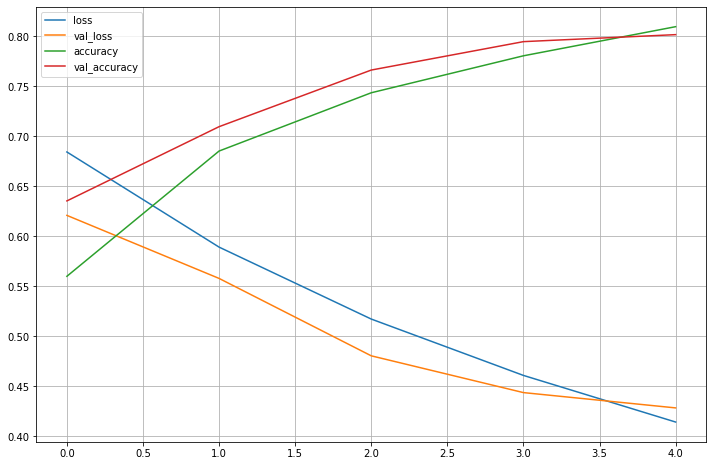

In [17]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)
    
plt.legend()
plt.grid()
plt.show()